# Customer Sentiment Analysis

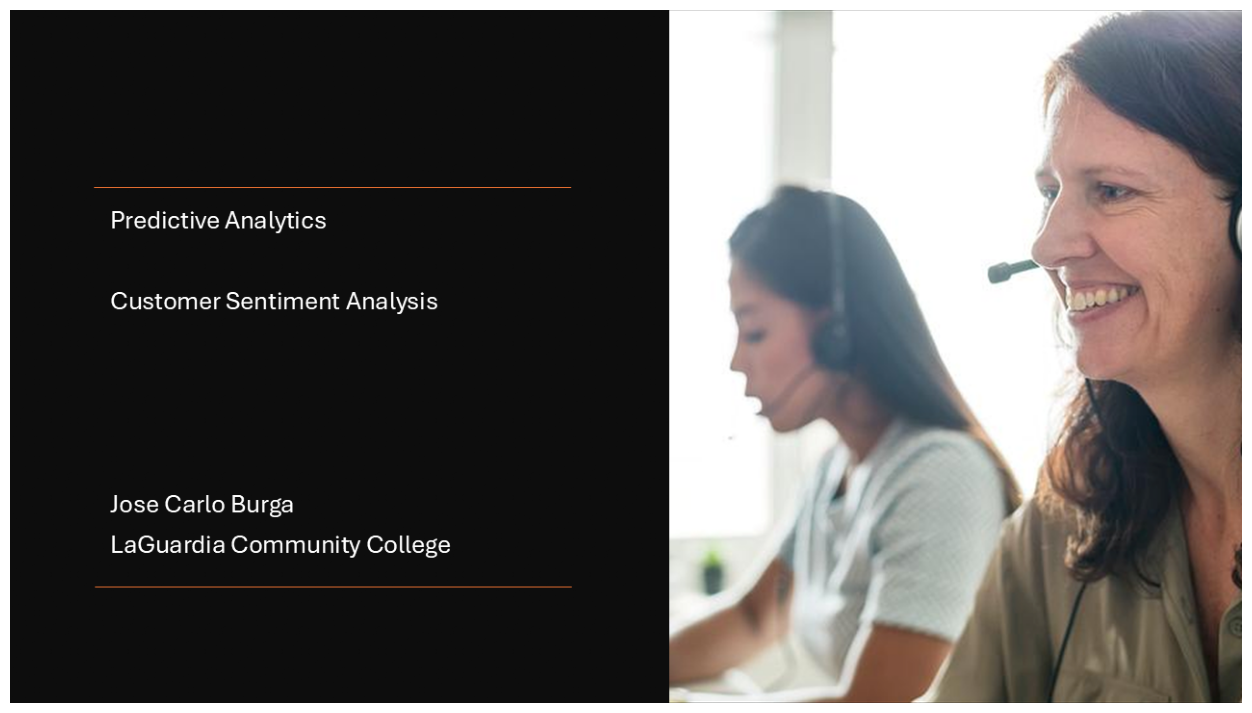

In [1297]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the image path
image_path = r"C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\Customer Satisfaction Pic.png"

# Load the image
img = mpimg.imread(image_path)

# Display the image with adjusted figure size
plt.figure(figsize=(16, 9))  # Adjust figsize as needed (width, height in inches)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Importing the necessary packages

In [1298]:
import pandas as pd
from datetime import datetime, timedelta
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Loading the dataset

In [1299]:
file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\customer_support_tickets.csv'

data = pd.read_csv(file_path)

# Dropping Unnecesary Features

In [1300]:
data.drop(['Customer Name', 'Customer Email', 'Ticket Subject', 'Ticket Description', 'First Response Time'], axis=1, inplace=True, errors='ignore')

# Initial Exploration

    # Summary of the dataset

In [1301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Age                  8469 non-null   int64  
 2   Customer Gender               8469 non-null   object 
 3   Product Purchased             8469 non-null   object 
 4   Date of Purchase              8469 non-null   object 
 5   Ticket Type                   8469 non-null   object 
 6   Ticket Status                 8469 non-null   object 
 7   Resolution                    2769 non-null   object 
 8   Ticket Priority               8469 non-null   object 
 9   Ticket Channel                8469 non-null   object 
 10  Time to Resolution            2769 non-null   object 
 11  Customer Satisfaction Rating  2769 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 794.1+ KB


    # Column Names

In [1302]:
data.columns

Index(['Ticket ID', 'Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

# Handling Missing Values

    # Missing value analysis

In [1303]:
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().mean() * 100).sort_values(ascending=False)

    # Combining  into a dataFrame for visualization

In [1304]:
missing_analysis = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

    # Heatmap visualization of missing values

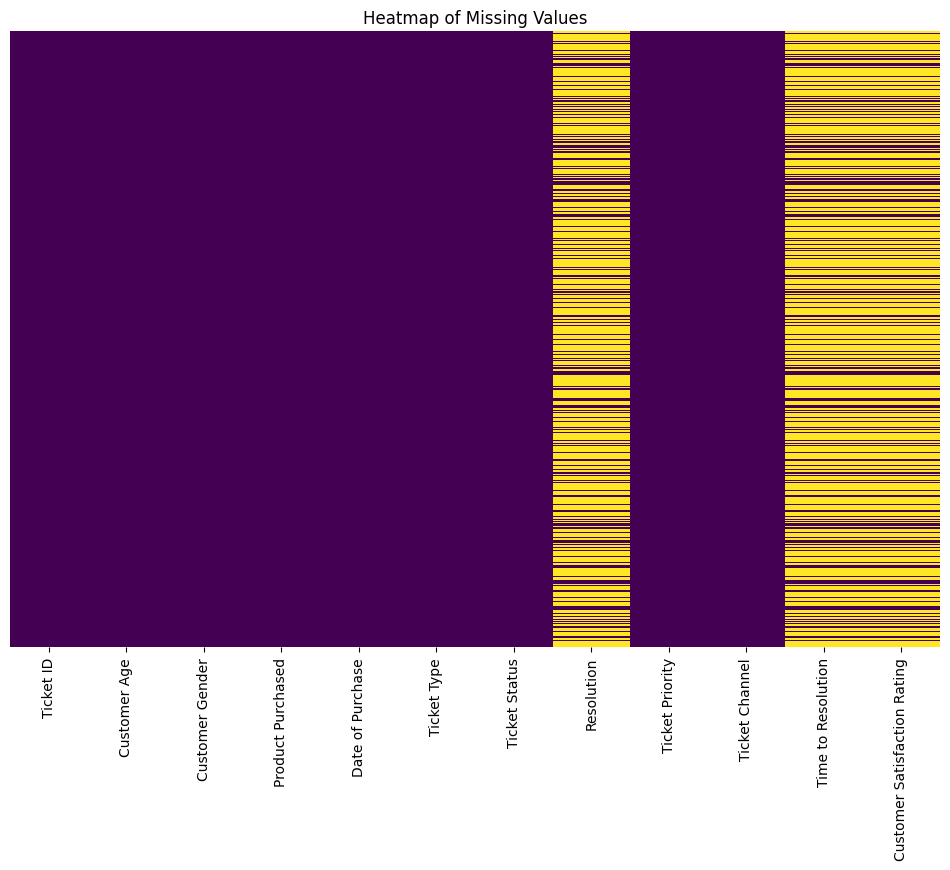

In [1305]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

    # Bar visualization of missing values

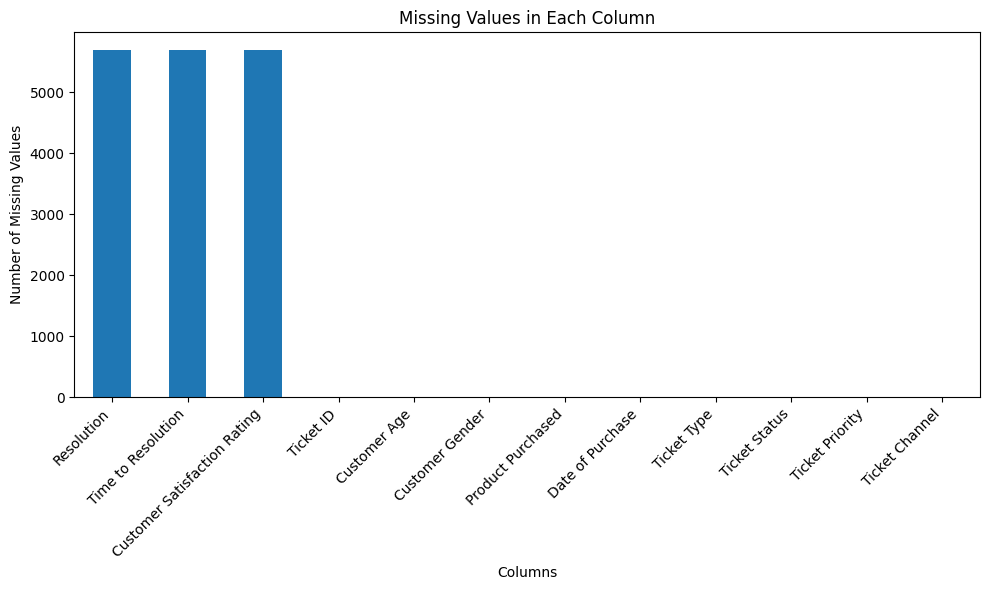

In [1306]:
missing_values = data.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


    # Imputing Missing Values

In [1307]:
# For numerical columns, using the median
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, using the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\jcbur\AppData\Local\Temp\ipykernel_9120\2100482321.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\jcbur\AppData\Local\Temp\ipykernel_9120\2100482321.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

    # Verifying that there are no missing values remaining

In [1308]:
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Ticket ID                       0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64


    # Verifying that missing values have been imputed

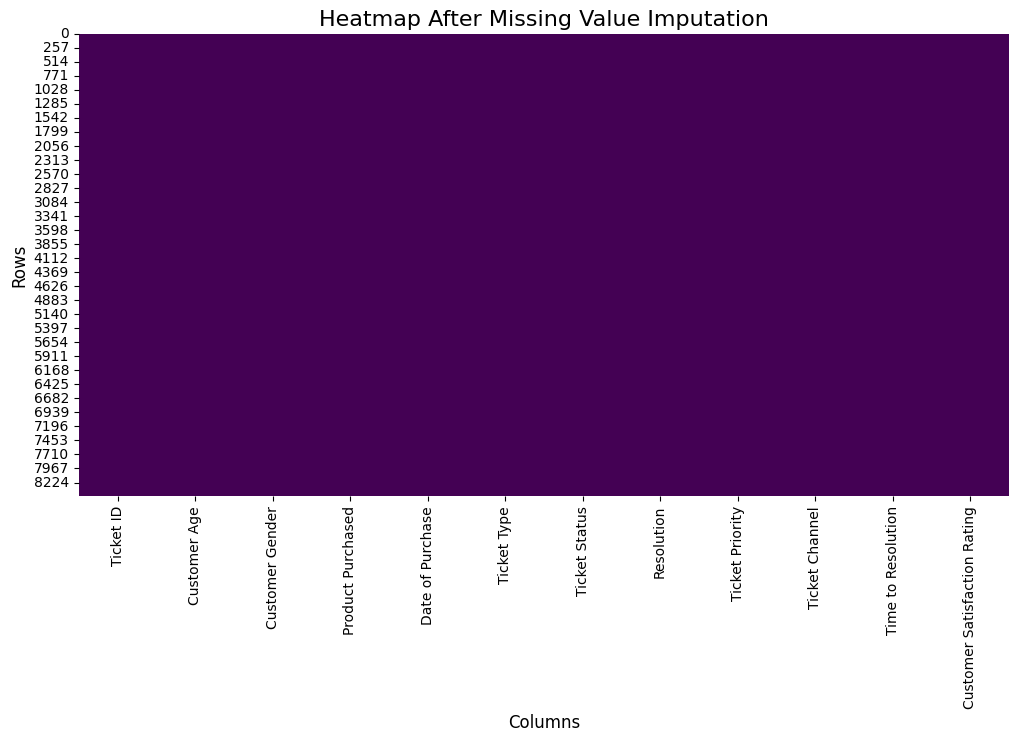

In [1309]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap After Missing Value Imputation", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

# Challenge: Predicting Customer Satisfaction Rating

    # Objective: Using features like 'Product Purchased', 'Ticket Type', 'Resolution Time', 'Customer Age', 'Customer Gender', and 'Ticket Priority", to predict customer's satisfaction rating.

    Actionability:

    Helps identify factors driving customer satisfaction.
    Enables proactive actions to improve service quality.

# Basic Transformations

    # Visualizing the current dataframe

In [1310]:
data.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Resolution,Ticket Priority,Ticket Channel,Time to Resolution,Customer Satisfaction Rating
0,1,32,Other,GoPro Hero,2021-03-22,Technical issue,Pending Customer Response,A former wrong interview then heart leg.,Critical,Social media,2023-06-01 17:14:42,3.0
1,2,42,Female,LG Smart TV,2021-05-22,Technical issue,Pending Customer Response,A former wrong interview then heart leg.,Critical,Chat,2023-06-01 17:14:42,3.0
2,3,48,Other,Dell XPS,2020-07-14,Technical issue,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 18:05:38,3.0
3,4,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 01:57:40,3.0
4,5,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Closed,West decision evidence bit.,Low,Email,2023-06-01 19:53:42,1.0


    # Visualizing the columns 

In [1311]:
data.columns

Index(['Ticket ID', 'Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

    # Calculating the lapse between the 'Date of Purchase' and 'Time to Resolution' 

In [1312]:
# Ensure 'Date of Purchase' and 'Time to Resolution' are in datetime format
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Calculate the duration (in days) between 'Date of Purchase' and 'Time to Resolution'
data['Duration (days)'] = (data['Time to Resolution'] - data['Date of Purchase']).dt.days

data.drop(['Date of Purchase', 'Time to Resolution'], axis=1, inplace=True, errors='ignore')

    # Encoding categorical values into the same column 

In [1313]:
data['Product Purchased'] = data['Product Purchased'].astype('category').cat.codes
data['Ticket Priority'] = data['Ticket Priority'].astype('category').cat.codes
data['Ticket Channel'] = data['Ticket Channel'].astype('category').cat.codes
data['Customer Gender'] = data['Customer Gender'].astype('category').cat.codes



    # Dropping unrelated features

In [1314]:
data.drop(['Ticket Type', 'Ticket Status', 'Resolution'], axis=1, inplace=True, errors='ignore')

    # Displaying the final result after transformations

In [1315]:
data.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,Duration (days)
0,1,32,2,16,0,3,3.0,801
1,2,42,0,21,0,0,3.0,740
2,3,48,2,10,2,3,3.0,1052
3,4,27,0,25,2,3,3.0,930
4,5,67,0,5,2,1,1.0,1213


In [1316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Age                  8469 non-null   int64  
 2   Customer Gender               8469 non-null   int8   
 3   Product Purchased             8469 non-null   int8   
 4   Ticket Priority               8469 non-null   int8   
 5   Ticket Channel                8469 non-null   int8   
 6   Customer Satisfaction Rating  8469 non-null   float64
 7   Duration (days)               8469 non-null   int64  
dtypes: float64(1), int64(3), int8(4)
memory usage: 297.9 KB


In [1317]:
data.columns

Index(['Ticket ID', 'Customer Age', 'Customer Gender', 'Product Purchased',
       'Ticket Priority', 'Ticket Channel', 'Customer Satisfaction Rating',
       'Duration (days)'],
      dtype='object')

In [1318]:
# Display the resulting DataFrame with the new feature
data.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,Duration (days)
0,1,32,2,16,0,3,3.0,801
1,2,42,0,21,0,0,3.0,740
2,3,48,2,10,2,3,3.0,1052
3,4,27,0,25,2,3,3.0,930
4,5,67,0,5,2,1,1.0,1213


# Correlation Analysis

Correlation with Customer Satisfaction Rating:

Customer Satisfaction Rating    1.000000
Duration (days)                 0.022034
Ticket Priority                 0.005761
Product Purchased               0.003403
Customer Gender                 0.000983
Customer Age                   -0.002172
Ticket ID                      -0.008135
Ticket Channel                 -0.015660
Name: Customer Satisfaction Rating, dtype: float64


C:\Users\jcbur\AppData\Local\Temp\ipykernel_9120\4102679507.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


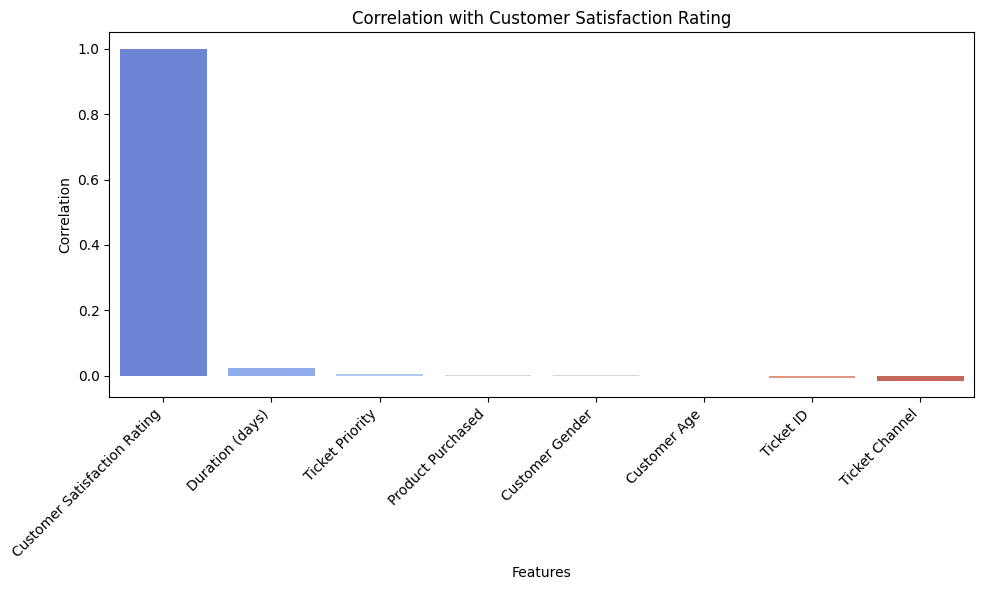

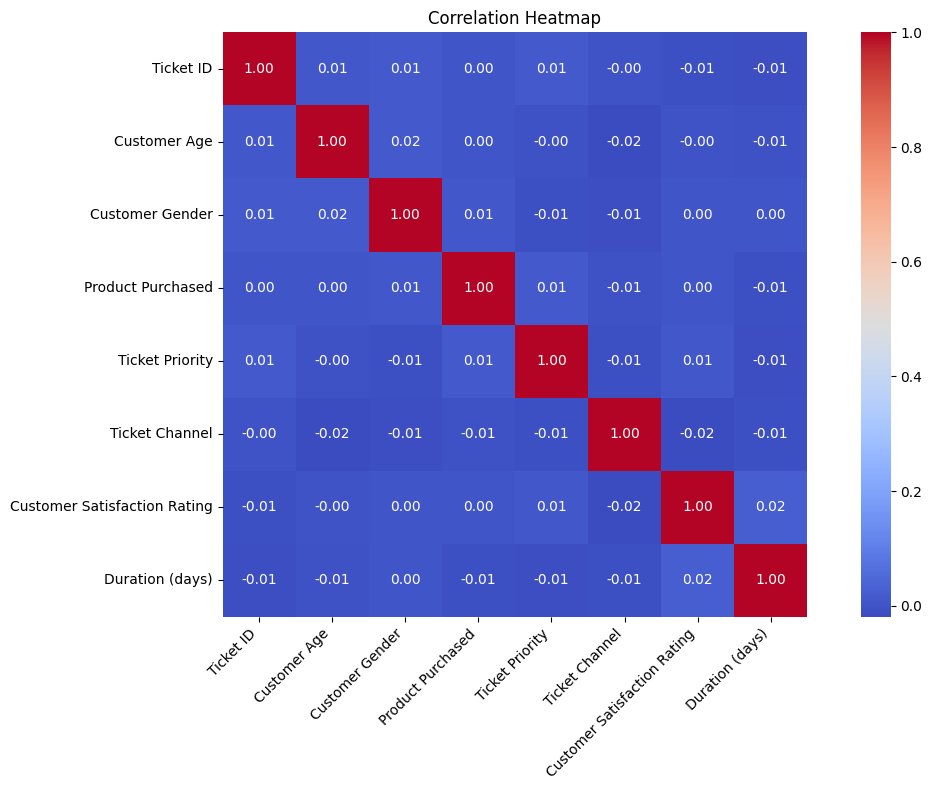

In [1319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Calculate correlation of all columns with 'Customer Satisfaction Rating'
correlation_with_satisfaction = data.corr()['Customer Satisfaction Rating'].sort_values(ascending=False)

# Print the correlations
print("Correlation with Customer Satisfaction Rating:\n")
print(correlation_with_satisfaction)

# Create a bar plot for correlations
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_satisfaction.index,
    y=correlation_with_satisfaction.values,
    palette="coolwarm"
)
plt.xticks(rotation=45, ha="right")
plt.title("Correlation with Customer Satisfaction Rating")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

# Create a heatmap for the full correlation matrix, highlighting Customer Satisfaction Rating
plt.figure(figsize=(12, 8))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    mask=None
)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Feature Selection

In [1320]:
data.drop(['Ticket ID', 'Customer Gender', 'Ticket Channel'], axis=1, inplace=True, errors='ignore')

In [1321]:
# Display the resulting DataFrame with the new feature
data.head()

,Customer Age,Product Purchased,Ticket Priority,Customer Satisfaction Rating,Duration (days)
0,32,16,0,3.0,801
1,42,21,0,3.0,740
2,48,10,2,3.0,1052
3,27,25,2,3.0,930
4,67,5,2,1.0,1213


                              Customer Age  Product Purchased  \
Customer Age                      1.000000           0.002180   
Product Purchased                 0.002180           1.000000   
Ticket Priority                  -0.004498           0.013698   
Customer Satisfaction Rating     -0.002172           0.003403   
Duration (days)                  -0.006818          -0.007785   

                              Ticket Priority  Customer Satisfaction Rating  \
Customer Age                        -0.004498                     -0.002172   
Product Purchased                    0.013698                      0.003403   
Ticket Priority                      1.000000                      0.005761   
Customer Satisfaction Rating         0.005761                      1.000000   
Duration (days)                     -0.012497                      0.022034   

                              Duration (days)  
Customer Age                        -0.006818  
Product Purchased                   -0

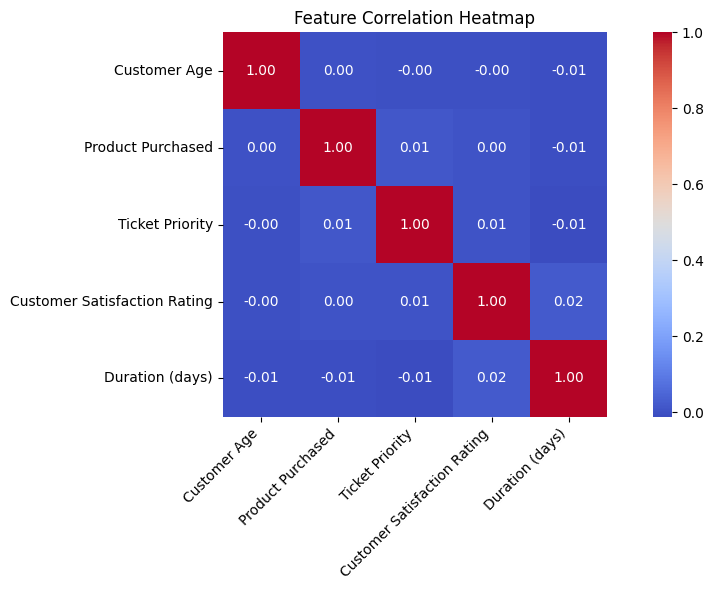

In [1322]:
# Correlation matrix for features
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Feature Engineering

# Model Testing

    # The dataframe displays a mix of original and engineered features
    # After the original features are dropped, only engineered features will be used used to test the acuracy of a logistic regression and a linear regression models
    # A bar visualization comparing accuracy rates will be displayed
 

# Dropping the original features

In [1323]:
# Drop original features
X_lr = data.drop(columns=['Customer Satisfaction Rating', 'Customer Age', 'Ticket Priority', 'Duration (days)'])
y_lr = data['Customer Satisfaction Rating']

# Convert target to categorical (logistic regression is for classification)
y_lr = (y_lr > y_lr.median()).astype(int)  # Example: convert to binary classes

# Split the data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)


# Preproccesing

In [1325]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Preprocess the data
data_subset = data[['Customer Age', 'Ticket Priority', 'Customer Satisfaction Rating']].dropna()

# Map 'Ticket Priority' to numeric values
priority_mapping = {'Critical': 2, 'High': 1, 'Low': 0}
data_subset['Ticket Priority'] = data_subset['Ticket Priority'].map(priority_mapping)

# Create binary target variable for logistic regression
median_rating = data_subset['Customer Satisfaction Rating'].median()
data_subset['Customer Satisfaction Binary'] = (data_subset['Customer Satisfaction Rating'] > median_rating).astype(int)

# Define features and target
X = data_subset[['Customer Age', 'Ticket Priority']]
y_classification = data_subset['Customer Satisfaction Binary']  # Binary target
y_regression = data_subset['Customer Satisfaction Rating']  # Original target for regression

# Resample the dataset for classification models
smote = SMOTE(random_state=42)
X_resampled, y_classification_resampled = smote.fit_resample(X, y_classification)

# Train/Test split for both classification and regression
X_train, X_test, y_train_classification, y_test_classification = train_test_split(
    X_resampled, y_classification_resampled, test_size=0.2, random_state=42)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42)


NameError: name 'X_resampled' is not defined